In [21]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date, timedelta
import matplotlib.pyplot as plt
from datetime import time

In [ ]:
df = 

In [8]:
df['date'] = pd.to_datetime(df.timestamp, unit='s')

NameError: name 'df' is not defined

In [ ]:
df1 = df['date']

In [ ]:
df1 = df1.to_frame()

In [ ]:
df1['time'] = df1.date.dt.time

In [ ]:
df1 = df1.sort_values(by='date',ascending=True)

In [ ]:
df1.to_csv('2machine')

In [ ]:
df1['ts'] = df1.date.values.astype(np.int64) // 10 ** 9`

In [ ]:
df1 = df1.sort_values(by='ts',ascending=True)

In [ ]:
df2 = pd.DataFrame(np.diff(df1.ts), columns=['time_diff'])

In [ ]:
down_time = df2.query('time_diff > 5000').time_diff.sum()

In [ ]:
total_time = df2.time_diff.sum()

In [5]:
work_time = total_time - down_time

NameError: name 'total_time' is not defined

In [ ]:
downtime

In [ ]:
dff = pd.DataFrame([down_time,total_time], index=['Время простоя','Время работы'], columns=['секунды'])

In [ ]:
dff

In [4]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 14.0

dff.plot.pie(y='секунды', figsize = (8,8),
             explode = (0, 0.03),
             autopct='%1.1f%%',
             colors=('tomato','dimgray'),
             labels= None,
             startangle=90,
             textprops={'color':"w"},
             ylabel = '')


NameError: name 'dff' is not defined

NameError: name 'dff' is not defined

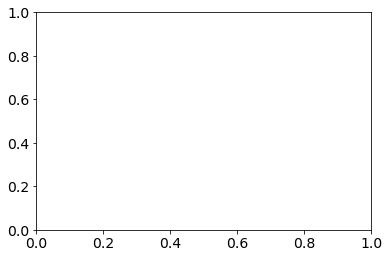

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 14.0

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs'
sizes = [15, 30]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots()
ax1.pie(dff[0], labels=dff.index,
             explode = (0, 0.05),
             autopct='%1.1f%%',
             colors=('tomato','dimgray'),
             startangle=90)
_, _,autotexts = ax1.pie(dff[0], labels=dff.index,
             explode = (0, 0.05),
             autopct='%1.1f%%',
             colors=('tomato','dimgray'),
             startangle=90)
for autotext in autotexts:
    autotext.set_color('white')

plt.show()

In [ ]:
down_time/work_time * 100

In [ ]:
last_day = dt.today().replace(day=1) - timedelta(days=1)

In [ ]:
start_day =  date.today().replace(day=1) - timedelta(days=last_day.day)

In [ ]:
start_day

In [ ]:
date.today().replace(day=1)

In [ ]:
timedelta(days=1)

In [ ]:
timedelta(days=last_day.day)

In [ ]:
last_day

In [ ]:
date.fromtimestamp()

In [ ]:
date.today().replace(day=1)

In [ ]:
str(start_day)

In [3]:
# import pandas as pd
# import numpy as np
# from datetime import datetime as dt
# from datetime import date, timedelta
# import mysql.connector
# from mysql.connector import Error
# import matplotlib as mpl
# mpl.rcParams['font.size'] = 12.0

# class Machine_stats:
    
#     def __init__(self):
#         self.machines_id = {1:'11010401', 2:'11030401', 4:'12040401', 5:'12060401', 6:'13070401'}
#         self.prev_month_last_day = date.today().replace(day=1) - timedelta(days=1)
#         self.prev_month_start_day =  date.today().replace(day=1) - timedelta(days=last_day.day)
#         self.today =  date.today()
#         self.curr_month_start_day = date.today().replace(day=1)
        
        
#     def read_database(self, date_in, date_out, id_num=1): 
#         conn = mysql.connector.connect(host='172.15.0.225',
#                                        database='dispall_cbk',
#                                        user='reader',
#                                        password='12341234')
        
#         query='''SELECT date_in
#                  FROM ustr
#                  WHERE id= {id} and znach>0 and
#                  date_in BETWEEN  "{datein}" and "{dateout}" '''.format(datein=date_in,
#                                        dateout= date_out,
#                                        id= self.machines_id[id_num])
#         df = pd.read_sql_query(query,conn)
#         df = df.rename(columns={'date_in' : 'date'})
#         conn.close()
#         return df
    
    
#     def find_diff(self,df):
#         df['ts'] = df.date.values.astype(np.int64) // 10 ** 9
#         df_diff = pd.DataFrame(np.diff(df.ts), columns=['time_diff'])
#         return df_diff
    
#     def prev_mon_pie_plot(self, id_num=1, time=300):
#         day_in = str(self.prev_month_start_day) + '00:00:00'
#         day_out = str(self.prev_month_last_day) + ' 23:59:59'
#         df = self.find_diff(self.read_database(day_in, day_out, id_num)) 
        
#         down_time = df.query('time_diff > @time').time_diff.sum() # время простоя
#         total_time = df.time_diff.sum() # общее время
#         work_time = total_time - down_time # время работы
        
#         plot_df = pd.DataFrame([down_time,total_time], index=['Время простоя','Время работы'], columns=['секунды'])
        
#         plot_df.plot.pie(y='секунды', figsize = (8,8),
#              explode = (0, 0.03),
#              autopct='%1.1f%%',
#              colors=('tomato','dimgray'),
#              labels= None,
#              startangle=90,
#              textprops={'color':"w"},
#              ylabel = '')
#         return f'Простой {down_time} работа {work_time}, общее время {total_time}'
        
#     def curr_mon_pie_plot(self, id_num=1, time=300):
#         day_in = str(self.curr_month_start_day)
#         day_out = str(self.today) + ' 23:59:59'
#         df = self.find_diff(self.read_database(day_in, day_out, id_num)) 
        
#         down_time = df.query('time_diff > @time').time_diff.sum() # время простоя
#         total_time = df.time_diff.sum() # общее время
#         work_time = total_time - down_time # время работы
        
#         plot_df = pd.DataFrame([down_time,work_time], index=['Время простоя','Время работы'], columns=['секунды'])
        
#         plot_df.plot.pie(y='секунды', figsize = (8,8),
#              explode = (0, 0.03),
#              autopct='%1.1f%%',
#              colors=('tomato','dimgray'),
#              labels= None,
#              startangle=90,
#              textprops={'color':"w"},
#              ylabel = '')
        
#         return f'Простой {down_time} работа {work_time}, общее время {total_time}'
    
#     def pie_plot(self,day_in, day_out, id_num=1, time=300):

#         df = self.find_diff(self.read_database(day_in, day_out, id_num)) 
        
#         down_time = df.query('time_diff > @time').time_diff.sum() # время простоя
#         total_time = df.time_diff.sum() # общее время
#         work_time = total_time - down_time # время работы
        
#         plot_df = pd.DataFrame([down_time,work_time], index=['Время простоя','Время работы'], columns=['секунды'])
        
#         plot_df.plot.pie(y='секунды', figsize = (8,8),
#              explode = (0, 0.03),
#              autopct='%1.1f%%',
#              colors=('tomato','dimgray'),
#              labels= None,
#              startangle=90,
#              textprops={'color':"w"},
#              ylabel = '')
        
#         return f'Простой {down_time} работа {work_time}, общее время {total_time}'

In [ ]:
'''SELECT date_in, znach\
   FROM ustr\
   WHERE date_in > {datein} and date_in < {dateout} and id={id} and znach>0'''.format(datein=str(start_day) + ' 23:59:59',
                                                                                     dateout= str(start_day) + ' 23:59:59',
                                                                                     id= '121212')

In [ ]:
 date.today()

In [4]:
b = Machine_stats()

NameError: name 'last_day' is not defined

In [ ]:
s1 = str(b.today) + ' 00:00:00'
s2 = str(b.today) + ' 23:59:59'

In [ ]:
s1

In [ ]:
b.pie_plot(s1,s2)

In [ ]:
df = b.read_database(s1,s2)
df['ts'] = df.date.values.astype(np.int64) // 10 ** 9
df_diff = pd.DataFrame(np.diff(df.ts), columns=['time_diff'])
df_diff

In [ ]:
df

In [ ]:
b.curr_mon_pie_plot()

In [ ]:
df1 = b.find_diff(df)

In [ ]:
df1

In [ ]:
str(b.prev_month_last_day)

In [ ]:
b.prev_month_start_day

In [ ]:
b.today

In [ ]:
b.curr_month_start_day

In [ ]:
a = b.pie_plot('2021-03-08 00:00:00','2021-03-08 23:59:59' )
#a['ts'] = a.date.values.astype(np.int64) // 10 ** 9
#a    

In [ ]:
aa = b.find_diff(a)
aa

In [ ]:
1615300359 - 1615161609 == aa.time_diff.sum()

(-2.2173217184429803,
 2.301343155005682,
 -2.2148799724242894,
 2.2132044380619837)

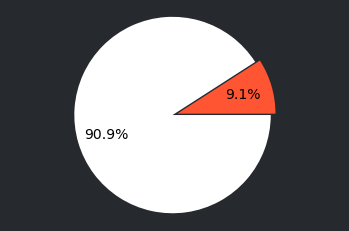

In [154]:
plt.rcParams['figure.facecolor'] = '#262a2f' 
plt.rcParams['legend.frameon'] = 'False'

vals = [10000, 100000]
labels = ['Время простоя', 'Время работы']
explode = (0.1, 0)
fig, ax = plt.subplots()

ax.pie(vals, labels=None, autopct='%1.1f%%', shadow=False,
explode=explode,
rotatelabels=True,
colors = ('#ff5533','w'),
pctdistance=0.7,
textprops = dict(color ="black"),
radius=2)
ax.axis('equal')
#plt.title('Грфик работы 1 машины за текущий месяц', fontsize=14, color='w', loc= )

# legend = ax.legend(labels,
#           loc ="lower center",
#           bbox_to_anchor =(0.75, 0.04, 0.5, 1)) 
# plt.setp(legend.get_texts(), color='w')

In [1]:
# plot_df.plot.pie(y='секунды', figsize=(8, 8),
        #                  explode=(0, 0.03),
        #                  autopct='%1.1f%%',
        #                  colors=('tomato', 'dimgray'),
        #                  labels=None,
        #                  startangle=90,
        #                  textprops={'color': "w"},
        #                  ylabel='')

In [2]:

        # fig, ax = plt.subplots(figsize= (3,3))
        # fig.set_facecolor((0.12,0.13,0.15))
        # ax.set_xlabel('', fontsize=10)
        # ax.set_ylabel('', fontsize=10)
        # ax.pie(plot_df['секунды'], labels=None,
        #         explode=(0, 0.05),
        #         autopct='%1.1f%%',
        #         colors=('tomato', 'dimgray'),
        #         startangle=90,
        #         textprops={'color': "w"},
        #         radius=1.5)

In [12]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date, timedelta
import mysql.connector
from mysql.connector import Error
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.size'] = 12.0


class MachineStatistics:

    def __init__(self):
        self.machines_id = {1: '11010401', 2: '11030401', 4: '12040401', 5: '12060401', 6: '13070401'}
        self.today = date.today()
        self.prev_month_last_day = self.today.replace(day=1) - timedelta(days=1)
        self.prev_month_start_day = self.today.replace(day=1) - timedelta(days=self.prev_month_last_day.day)
        self.curr_month_start_day = self.today.replace(day=1)

    def read_database(self, date_in, date_out, id_num=1):
        conn = mysql.connector.connect(host='172.15.0.225',
                                       database='dispall_cbk',
                                       user='reader',
                                       password='12341234')

        query = '''SELECT date_in
                 FROM ustr
                 WHERE id= {id} and znach>0 and
                 date_in BETWEEN  "{datein}" and "{dateout}" '''.format(datein=date_in,
                                                                        dateout=date_out,
                                                                        id=self.machines_id[id_num])
        df = pd.read_sql_query(query, conn)
        df = df.rename(columns={'date_in': 'date'})
        return df

    def find_diff(self, df):
        df['ts'] = df.date.values.astype(np.int64) // 10 ** 9
        df_diff = pd.DataFrame(np.diff(df.ts), columns=['time_diff'])
        return df_diff

    def prev_mon_pie_plot(self, id_num=1, time=300):
        day_in = str(self.prev_month_start_day) + ' 00:00:00'
        day_out = str(self.prev_month_last_day) + ' 23:59:59'
        df = self.find_diff(self.read_database(day_in, day_out, id_num))
        
        down_time = df.query('time_diff > @time').time_diff.sum()  # время простоя
        total_time = df.time_diff.sum()  # общее время
        work_time = total_time - down_time  # время работы
        print(total_time)
        plot_df = pd.DataFrame([down_time, work_time], index=['Время простоя', 'Время работы'], columns=['секунды'])
        fig, ax = self.bild_plot(plot_df)
        return fig, ax

    def curr_mon_pie_plot(self, id_num=1, time=300):
        day_in = str(self.curr_month_start_day) + ' 00:00:00'
        day_out = str(self.today) + ' 23:59:59'
        df = self.find_diff(self.read_database(day_in, day_out, id_num))

        down_time = df.query('time_diff > @time').time_diff.sum()  # время простоя
        total_time = df.time_diff.sum()  # общее время
       
        work_time = total_time - down_time  # время работы

        plot_df = pd.DataFrame([down_time, work_time], index=['Время простоя', 'Время работы'], columns=['секунды'])
        fig, ax = self.bild_plot(plot_df)
        return fig, ax

    def pie_plot(self, day_in, day_out, id_num=1, time=300):
        df = self.find_diff(self.read_database(day_in, day_out, id_num))

        down_time = df.query('time_diff > @time').time_diff.sum()  # время простоя
        total_time = df.time_diff.sum()  # общее время
        work_time = total_time - down_time  # время работы

        plot_df = pd.DataFrame([down_time, work_time], index=['Время простоя', 'Время работы'], columns=['секунды'])
        fig, ax = self.bild_plot(plot_df)
        return fig, ax


    def bild_plot(self,plot_df):
        plt.rcParams['figure.facecolor'] = '#262a2f'
        plt.rcParams['legend.frameon'] = 'False'

        vals = plot_df['секунды']
        labels = ['Время простоя', 'Время работы']
        explode = (0.1, 0)
        fig, ax = plt.subplots(figsize=(10,10))

        ax.pie(vals, labels=None, autopct='%1.1f%%', shadow=False,
               explode=explode,
               rotatelabels=True,
               colors=('#ff5533', 'w'),
               pctdistance=0.6,
               textprops=dict(color="black"),
               radius=1.4)
        #ax.axis('equal')
        return fig, ax




In [15]:
a = MachineStatistics()
d1 = str(a.curr_month_start_day) + ' 00:00:00'
d2 = str(a.today) + ' 23:59:59'

In [20]:
df = a.read_database(d1,d2,id_num=5)
df['ts'] = df.date.values.astype(np.int64) // 10 ** 9
df

,date,ts
0,2021-03-01 00:00:02,1614556802
1,2021-03-01 00:00:12,1614556812
2,2021-03-01 00:00:27,1614556827
3,2021-03-01 00:00:37,1614556837
4,2021-03-01 00:00:52,1614556852
...,...,...
87128,2021-03-15 10:10:44,1615803044
87129,2021-03-15 10:10:54,1615803054
87130,2021-03-15 10:11:04,1615803064
87131,2021-03-15 10:11:19,1615803079


2419190


(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

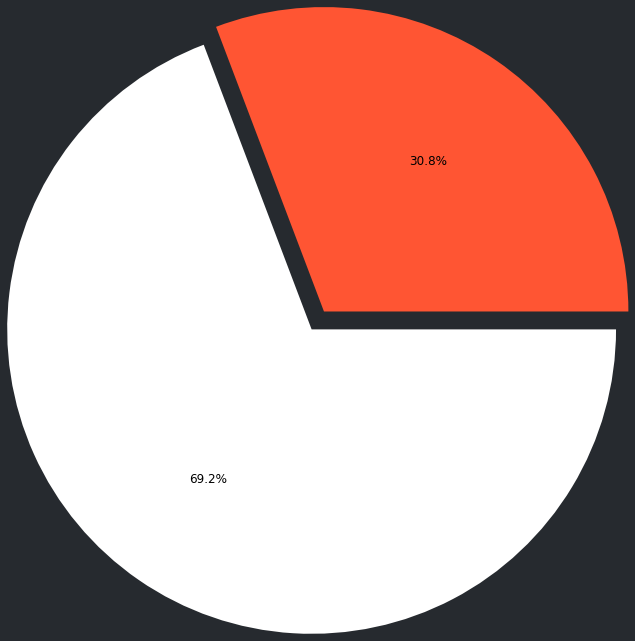

In [45]:
a.prev_mon_pie_plot()

In [19]:
a.find_diff(a.read_database(d1,d2))

,time_diff
0,15
1,10
2,5
3,10
4,5
...,...
80446,10
80447,10
80448,10
80449,10


In [21]:
date1 = a.prev_month_last_day - a.prev_month_start_day

In [24]:
date1

datetime.timedelta(days=27)

In [25]:
day_in = str(a.prev_month_start_day) + ' 00:00:00'
day_out = str(a.prev_month_last_day) + ' 23:59:59'

In [27]:
day_in

'2021-02-01 00:00:00'

In [40]:
dd = dt.strptime(day_in,'%Y-%m-%d %H:%M:%S').timestamp()

In [41]:
ds = dt.strptime(day_out,'%Y-%m-%d %H:%M:%S').timestamp()

In [42]:
ds- dd

2419199.0

In [2]:
len('def prepare_canvas_and_toolbar(func,wiget,id_num,time=300,parent= None):')

72

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date, timedelta
import mysql.connector
from mysql.connector import Error
import matplotlib as mpl
import matplotlib.pyplot as plt


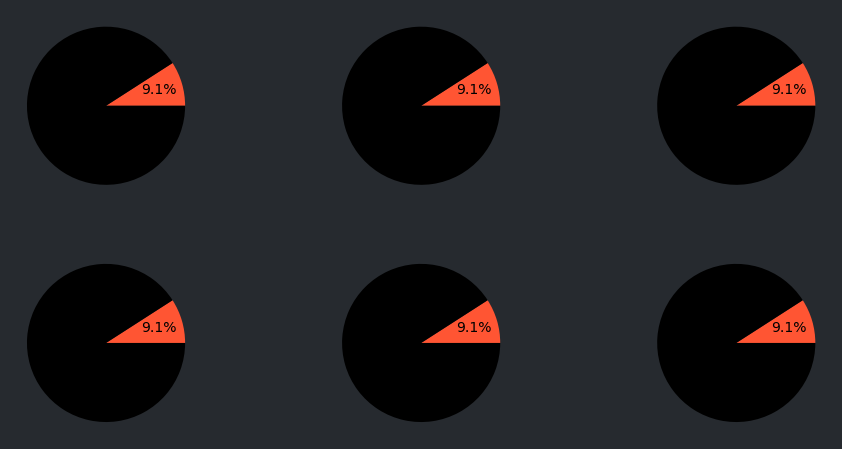

In [173]:
fig, axes = plt.subplots(2,3, figsize=(16, 8))
plot_df = pd.DataFrame([10000, 100000], index=['Время простоя', 'Время работы'], columns=['секунды'])
for i in range(2):
    for j in range(3):
        axes[i][j].pie(plot_df['секунды'], labels=None, autopct='%1.1f%%', shadow=False,
               rotatelabels=True,
               colors=('#ff5533', 'black'),
               pctdistance=0.7,
               textprops=dict(color="black"),
               radius=1)    


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [162]:
for i in range(2):
    for j in range(3):
        axes[i][j].pie(plot_df['секунды'], labels=None, autopct='%1.1f%%', shadow=False,
               rotatelabels=True,
               colors=('#ff5533', 'black'),
               pctdistance=0.7,
               textprops=dict(color="black"),
               radius=1) 
        

In [170]:
for i in range(2):
    for j in range(3):
        axes[i][j].pie(plot_df['секунды'], labels=None, autopct='%1.1f%%', shadow=False,
               rotatelabels=True,
               colors=('#ff5533', 'black'),
               pctdistance=0.7,
               textprops=dict(color="black"),
               radius=1) 
plt.show()

In [171]:
fig.canvas.draw()

In [196]:
l1= [0,1,2]
l2 = [2,3,4]
for i,j in list(zip(l1,d.values())):
    print(i,j)

0 11
1 111
2 1111


In [184]:
d = {1:'11',2:'111',3:'1111'}

In [194]:
list(zip(l1,d.values()))

[(0, '11'), (1, '111'), (2, '1111')]

In [187]:
d.items()

dict_items([(1, '11'), (2, '111'), (3, '1111')])

([<matplotlib.patches.Wedge at 0xa735460>,
 [Text(0.5499999702695115, 0.9526279613277875, ''),
  Text(-0.5499998810780428, -0.9526280128224968, '')])

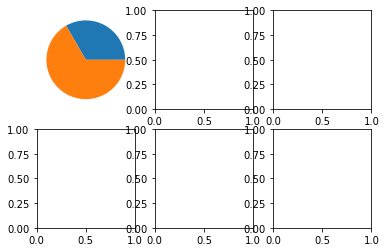

In [11]:
fig, ax = plt.subplots(2,3)
ax[0][0].pie([10,20])

In [10]:
ax[0][0].pie([10,20])


([<matplotlib.patches.Wedge at 0xa392760>,
 [Text(0.5499999702695115, 0.9526279613277875, ''),
  Text(-0.5499998810780428, -0.9526280128224968, '')])

In [1]:
import matplotlib

In [2]:
print (matplotlib.get_backend())

module://ipykernel.pylab.backend_inline


In [27]:
import time
count= 0
while True:
    count += 1
    print(count)
    time.sleep(30)
           

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


KeyboardInterrupt: 

In [31]:

ides = [1110212,2,3,4,5,6,7,8,9]
lst = []

for id in ides:
   
    query = f'select znach from ustr_now where id = {id}'
    print(query)


select znach from ustr_now where id = 1110212
select znach from ustr_now where id = 2
select znach from ustr_now where id = 3
select znach from ustr_now where id = 4
select znach from ustr_now where id = 5
select znach from ustr_now where id = 6
select znach from ustr_now where id = 7
select znach from ustr_now where id = 8
select znach from ustr_now where id = 9


In [34]:
results = (144,)

In [35]:
results

(144, 545, 4545)

In [36]:
results[0]

144

In [37]:
lst = []

In [42]:
lst.append(results[2])

In [43]:
lst

[144, 545, 4545]